## Indian Liver Disease Classification Machine Learning Ops (MLOps) 
### Hi Everybody, My name is Abdullah and I'm a Junior Data Scientist/Engineer. Just trying to put up some code on Kaggle in order to see how I am with coding and what not. Would love to hear your input! 

## A few Pointers:
* Everythings coded in Python
* Everythings coded in Kaggles version of Jupyter Notebook 
* I'm just on the Intermediate level, so I would appreciate any constructive criticism from the experts on Kaggle :) 
* Add me on LinkedIn maybe ? www.linkedin.com/in/abanwar

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-liver-patient-dataset/Indian Liver Patient Dataset (ILPD).csv


# Data Analysis

In [2]:
data = pd.read_csv('/kaggle/input/indian-liver-patient-dataset/Indian Liver Patient Dataset (ILPD).csv')

In [3]:
#Looking at Data in order to have a look and feel
data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
#Looking at the tail of it 
data.tail()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [5]:
#Looking at the information contained within the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

# Imputation using SkLearns Simple Imputer for Missing Values

In [7]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [8]:
#Imputing values
data['alkphos']=imp.fit_transform(data[['alkphos']])

In [9]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [10]:
data.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# Age has been excluded as it is a String Value and not a Number

In [11]:
#Replacing Male and Female with 1 and 0
data['gender'] = data['gender'].apply(lambda x:1 if x == 'Male' else 0)

In [12]:
#Now looking at the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    int64  
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           583 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [13]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [14]:
data.nunique()

age                  72
gender                2
tot_bilirubin       113
direct_bilirubin     80
tot_proteins        263
albumin             152
ag_ratio            177
sgpt                 58
sgot                 40
alkphos              70
is_patient            2
dtype: int64

# Correlation Plot Map

In [15]:
#Now it's time to see the correlation
data.corr().style.background_gradient(cmap='coolwarm')

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
tot_bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
direct_bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
tot_proteins,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
albumin,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
ag_ratio,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
sgpt,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
sgot,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
alkphos,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


# Seaborns PairPlot

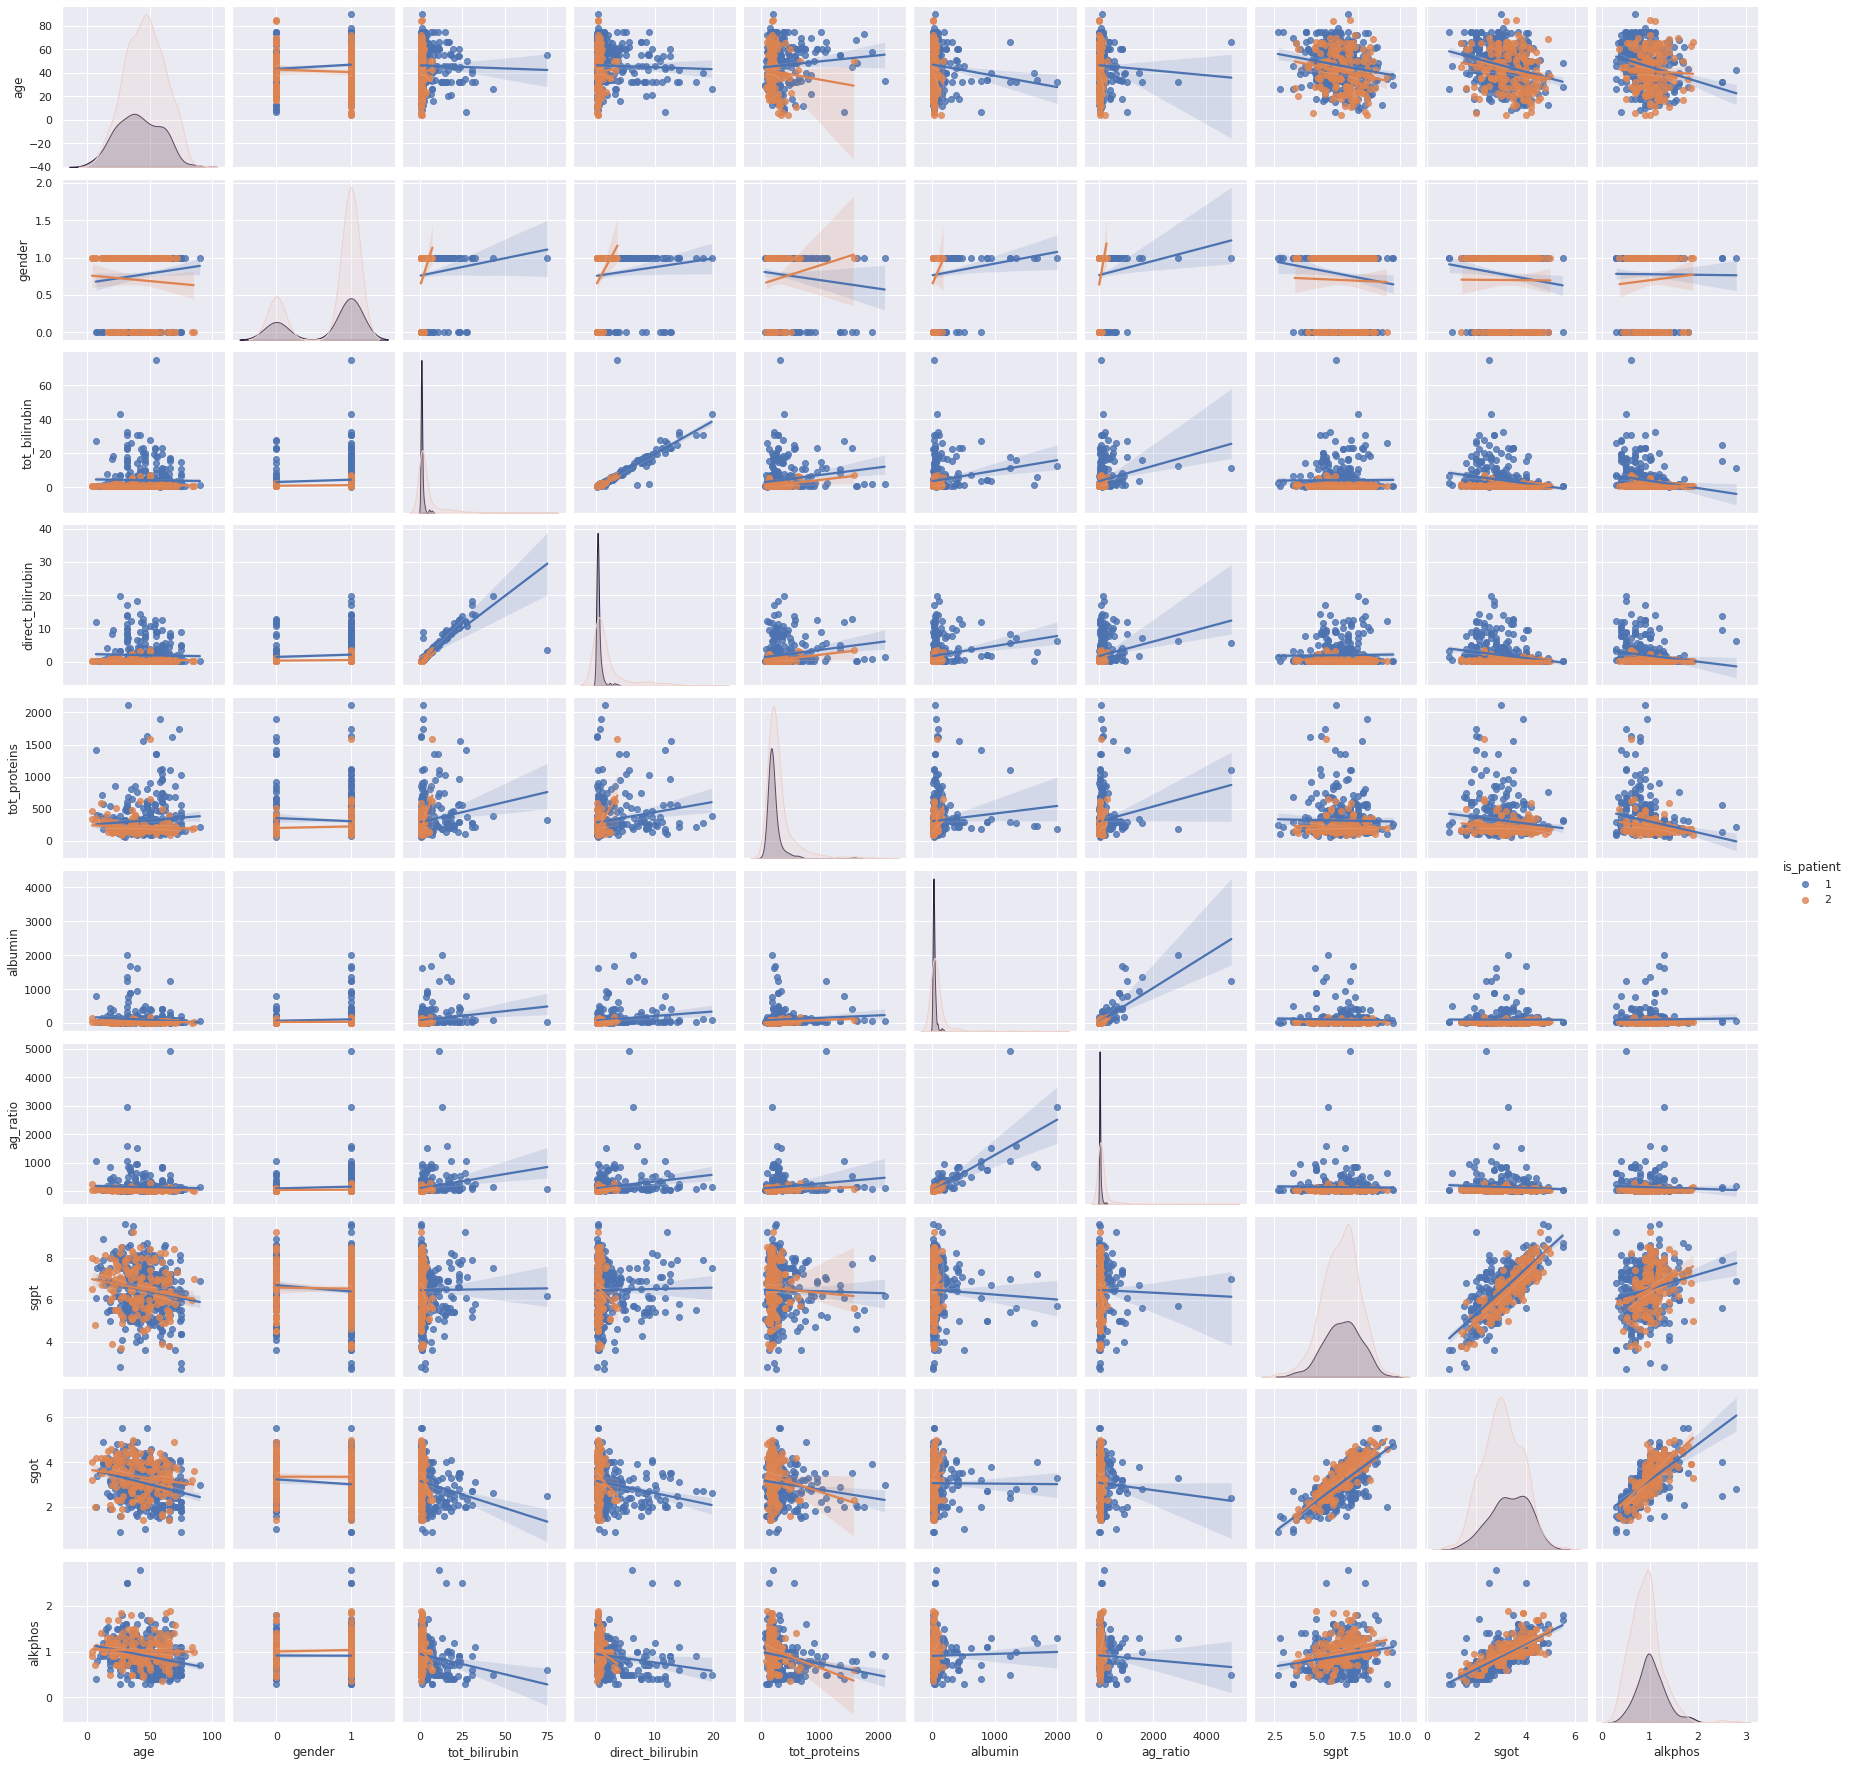

In [16]:
import seaborn as sns
#Implementing Pairplot to see the various mixtures
sns.set()
sns.pairplot(data, hue= 'is_patient', kind = 'reg')

#sns.pairplot(df_liver, hue='Dataset', kind='reg')

# Variance Inflation to see the best models
## Later on, in the notebook, there will be a chance to see the best features by using Random Forests *best features* method

In [17]:
#Importing variance inflation factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [18]:
data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Making the Test Set, excluding the Target, i.e "y" variable in order to meet up with Variance Inflations (vif's) syntax

In [19]:
#Making New Data Sets for Computation
#Select all rows except for the Target variable
Test_Set_Var = data.iloc[:,:10]

In [20]:
df = pd.DataFrame()
df["vif_index"] = [vif(Test_Set_Var.values, i) for i in range(Test_Set_Var.shape[1])]
df["features"] = Test_Set_Var.columns
df.sort_values(by = 'vif_index', ascending=False)

,vif_index,features
8,133.055715,sgot
7,101.860900,sgpt
9,25.717649,alkphos
0,7.813077,age
3,5.736207,direct_bilirubin
2,5.479228,tot_bilirubin
1,4.087526,gender
5,3.308649,albumin
6,3.192721,ag_ratio
4,2.650280,tot_proteins


In [21]:
#Over here we can see that sgot, sgpt, and alkphos have the highest amount for the VIF Index.
#Normally, a value above 10 would mean that we should slash it out however,
#This is a medical data set, we should still consider these variables as it seems to have some
#form of correlation according to my minimal industry knowledge. Any input would be appreciated! 

# Seeing Variations in outputs with respect to Gender

#### The plots are quite small hence, I've decided to plot certain plots individually and print out a few Data Frames

In [22]:
gender_data = data[['gender', 'is_patient']].groupby('gender', as_index = False).agg(np.sum)
gender_data

,gender,is_patient
0,0,192
1,1,558


In [23]:
#Importing MatplotLib
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Men and Womnens Ratio with respect to Having Disease or Not'}, xlabel='gender', ylabel='is_patient'>

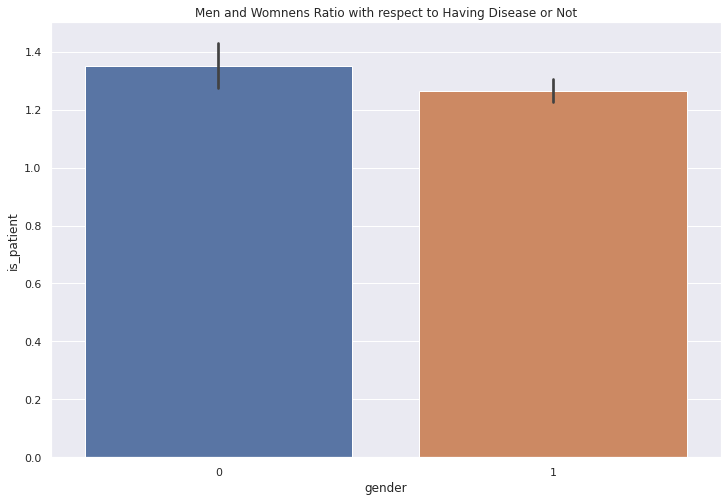

In [24]:
plt.figure(figsize= (12,8))
plt.title('Men and Womnens Ratio with respect to Having Disease or Not')
sns.barplot(x = 'gender', y = 'is_patient', data = data)

<AxesSubplot:title={'center':'Men and Womnens Numbers with respect to Having Disease or Not'}, xlabel='gender', ylabel='is_patient'>

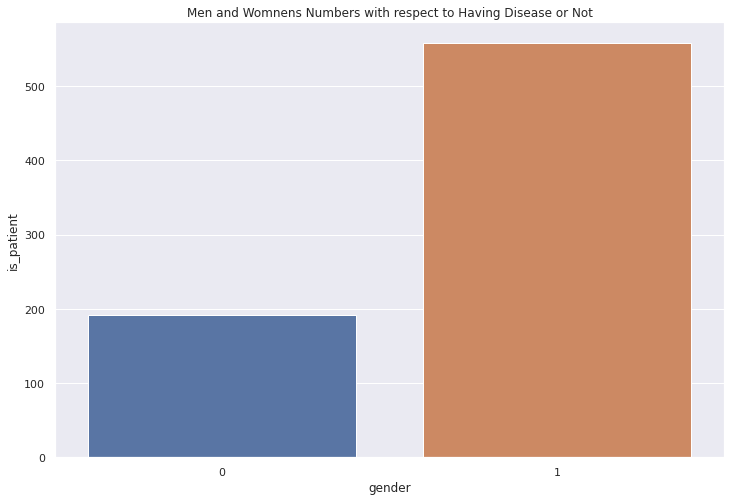

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize= (12,8))
plt.title('Men and Womnens Numbers with respect to Having Disease or Not')
sns.barplot(x = 'gender', y = 'is_patient', data = gender_data)

## We can see that Men have a higher chance of having Liver Disease, but how/why ? 

##### Trying to see a relationship between Proteins and Gender. I'm not a Bio-med Major,
##### We can see a relationship between total_proteins, gender and their final outcome

In [26]:
df_liver_TP = data[['gender', 'tot_proteins', 'is_patient']].groupby(['gender'], as_index=False).agg(np.sum)
df_liver_TP

,gender,tot_proteins,is_patient
0,0,42932,192
1,1,126474,558


<AxesSubplot:xlabel='gender', ylabel='tot_proteins'>

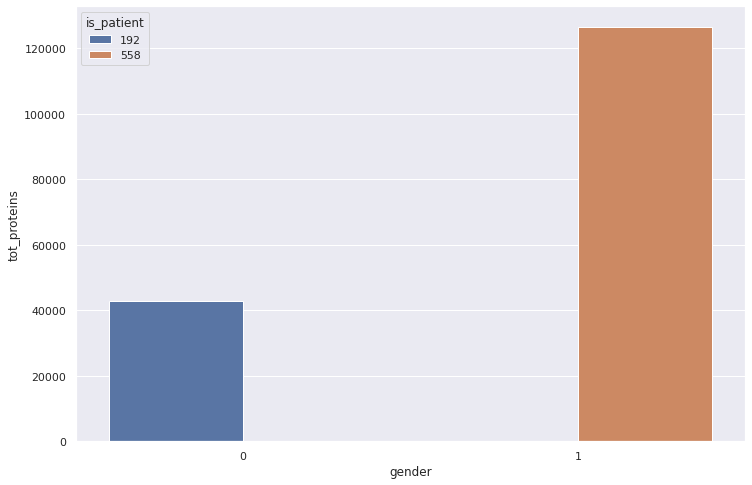

In [27]:
#Plotting it on a graph for better visualization
plt.figure(figsize = (12,8))
sns.barplot(x = 'gender', y = 'tot_proteins', hue= 'is_patient', data = df_liver_TP)

In [28]:
#Before moving forward we can try and see the different stats of the whole data set
#This is without the NaN's meaning we haven't includes the empty variables
data.describe()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [29]:
data.shape

(583, 11)

# Machine Learning Section (MLOps)

In [30]:
#Importing the Necessary Modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [31]:
#Defining X and y as we never defined it
X = data.iloc[:, :10]
y = data['is_patient']

# Scaling using MinMaxScaler

In [32]:
#Using Scaling Methods to scale the entire data set as I'm running into errors
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(X)
X.loc[:,:]=scaled_values

# Using Hold Out Method.
## I was a bit skeptical to use the Cross-Validation method but I would maybe give it a try

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 123)

In [34]:
#Checking to see isnull again, I'm good so far :) 
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_test.isnull().sum())
print(y_test.isnull().sum())

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
dtype: int64
0
age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
dtype: int64
0


Checking to see Shape Again

In [35]:
print(f'Shape of X:{X_train.shape}, Shape of y: {y_train.shape}')

Shape of X:(408, 10), Shape of y: (408,)


In [36]:
print(f'Shape of X:{X_test.shape}, Shape of y: {y_test.shape}')

Shape of X:(175, 10), Shape of y: (175,)


# Instantiating Classifiers

In [37]:
#Instantiating 3 Classification Models
dt = DecisionTreeClassifier(max_depth=4,min_samples_leaf=0.14,random_state=1)
lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
KNN_1 = KNN(n_neighbors = 10)
rf = RandomForestClassifier(n_estimators=25, random_state=2)

# Making a List of Tuples for Automating the results
## First I would like to individually hard code them however, both methods shall be used :)

In [38]:
classifiers = [('Decision Tree',dt),('Logistic Regression',lr),('KNN',KNN_1), ('Random Forest', rf)]

# Decision Tree Classifier

In [39]:
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_acc_test = accuracy_score(y_test, dt_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(dt_acc_test)) 

Test set accuracy of dt: 0.70


# Logisitic Regression

In [40]:
#Logistic Regression Accuracy
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
lr_acc_test = accuracy_score(y_test, lr_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(lr_acc_test)) 

Test set accuracy of dt: 0.73


# K-Neighbors Classifier

In [41]:
#KNN Accuracy
KNN_1.fit(X_train, y_train)
knn_y_pred = KNN_1.predict(X_test)
knn_acc_test = accuracy_score(y_test, knn_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(knn_acc_test)) 

Test set accuracy of dt: 0.69


# Random Forest Classifier

In [42]:
#Random Forest Accuracy
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_acc_test = accuracy_score(y_test, rf_y_pred)
print('Test set accuracy of dt: {:.2f}'.format(rf_acc_test)) 

Test set accuracy of dt: 0.73


# Random Forest's Feature Importance

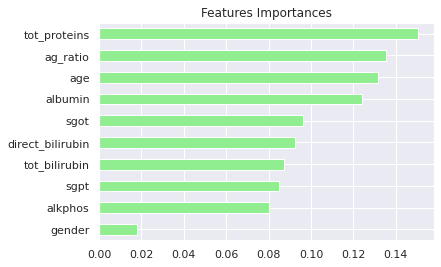

In [43]:
#Using RF to see Best Features
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

# Running the Automation Method :)

In [44]:
#Decided to run them all together and print them out in a for loop for Automation
for clf_name, clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Decision Tree : 0.703
Logistic Regression : 0.726
KNN : 0.691
Random Forest : 0.731


# Predict Proba Scores 
## For those who don't know, Predict Proba basically means the probability of having the correct output i.e 1 or 0

In [45]:
#Predict Proba Scores
y_score1 = dt.predict_proba(X_test)[:,1]
y_score2 = lr.predict_proba(X_test)[:,1]
y_score3 = KNN_1.predict_proba(X_test)[:,1]
y_score4 = rf.predict_proba(X_test)[:,1]

# Receiver Operating Characteristic (ROC) and Area under the curve (AUC) Score

In [46]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for KNearest Neighbors: ', roc_auc_score(y_test, y_score3))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score4))

roc_auc_score for DecisionTree:  0.7021379980563655
roc_auc_score for Logistic Regression:  0.7048914804016846
roc_auc_score for KNearest Neighbors:  0.6484450923226434
roc_auc_score for Random Forest:  0.7364755425979915


# Plotting the Random Forests ROC Curve

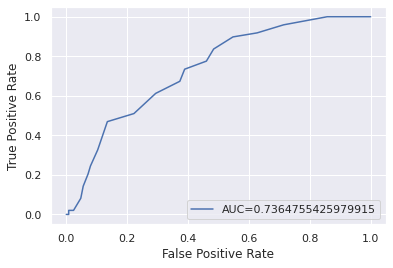

In [47]:
#define metrics
y_pred_proba_rf_auc = rf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test,  y_pred_proba_rf_auc, pos_label = 2)
rf_auc = roc_auc_score(y_test, y_score4)


#create ROC curve
plt.plot(fpr_rf,tpr_rf,label="AUC="+str(rf_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Plotting the Logistic Regressions ROC Curve

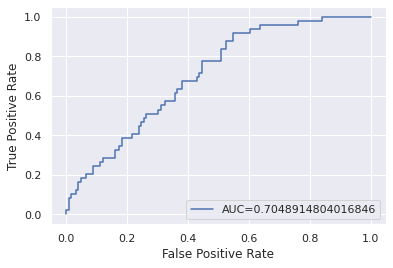

In [48]:
#define metrics
y_pred_proba_auc_lr = lr.predict_proba(X_test)[::,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test,  y_pred_proba_auc_lr, pos_label = 2)
lr_auc = roc_auc_score(y_test, y_score2)


#create ROC curve
plt.plot(fpr_lr,tpr_lr,label="AUC="+str(lr_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc =4)
plt.show()

# Plotting the KNearestNeighbors ROC Curve

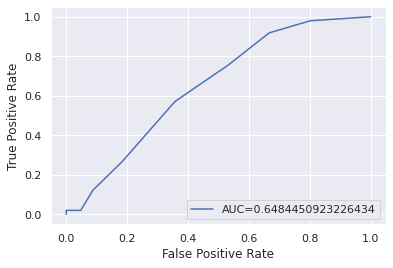

In [49]:
#define metrics
y_pred_proba_auc_knn = KNN_1.predict_proba(X_test)[::,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test,  y_pred_proba_auc_knn, pos_label = 2)
knn_auc = roc_auc_score(y_test, y_score3)

#create ROC curve
plt.plot(fpr_knn,tpr_knn,label="AUC="+str(knn_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc =4)
plt.show()

# Plotting the Decision Tree's ROC Curve

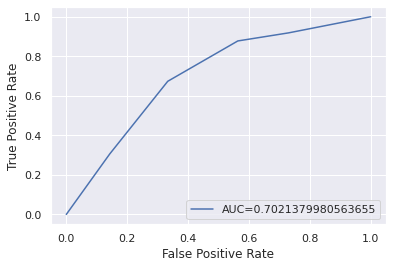

In [50]:
#define metrics
y_pred_proba_auc_dt = dt.predict_proba(X_test)[::,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test,  y_pred_proba_auc_dt, pos_label = 2)
dt_auc = roc_auc_score(y_test, y_score1)


#create ROC curve
plt.plot(fpr_dt,tpr_dt,label="AUC="+str(dt_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc =4)
plt.show()

# Results in a Data Frame

In [51]:
results = pd.DataFrame({'Model': ['Decision Tree','Logistic Regression', 'KNN','Random Forest Classifier'],
                        'Roc_Score': [roc_auc_score(y_test, y_score1), roc_auc_score(y_test, y_score2),roc_auc_score(y_test, y_score3), roc_auc_score(y_test, y_score4)],
                       'Accuracy_Score': [dt_acc_test, lr_acc_test,knn_acc_test, rf_acc_test]})
df_results = results.sort_values(by='Roc_Score', ascending=False)
df_results

,Model,Roc_Score,Accuracy_Score
3,Random Forest Classifier,0.736476,0.731429
1,Logistic Regression,0.704891,0.725714
0,Decision Tree,0.702138,0.702857
2,KNN,0.648445,0.691429


# Any input would be highly appreciated :D